# gifrer海外旗舰店订单&会员信息分析

## 项目简介
    本品牌是一个法国母婴健康护理品牌，主打产品生理盐水滴鼻剂和生理盐水鼻喷，该类产品在国内家庭的使用还没有太普遍，但在欧洲这类产品属于宝宝日常护理必备品，笔主为该品牌的天猫海外旗舰店的运营负责人，下面将通过对2016.10-2018.4的数据来探索一下该店铺的整体情况

## 数据来源
    本项目采用了两份数据集进行分析。
    第一份来自于生e经软件导出的店铺所有付款订单的信息(不包含收货地址等个人信息)。
    第二份来自于集客crm导出的会员信息数据(包含收货地址等个人信息)。
    由于涉及用户隐私，所以不上传相关数据集。

## 分析目录
### 1. 理解&选取数据
    1.1 订单表信息选取
    1.2 会员表信息选取
### 2. 数据清洗
    2.1 时间类型处理
    2.2 字符类型处理
### 3. 用户消费趋势分析(按月)
    3.1 每月总消费金额
    3.2 每月总消费次数
    3.3 每月总产品购买量
    3.4 每月总消费人数
    3.5 每月用户平均消费金额
    3.6 每月用户平均消费次数
    3.7 每月用户平均消费件数
### 4. 用户个体消费分析
    4.1 用户消费金额、消费次数、消费件数的描述统计
    4.2 用户消费金额和消费次数的散点图
    4.3 用户消费次数的分布图
    4.4 用户消费件数的分布图
    4.5 用户消费金额的分布图
    4.6 用户累计消费金额占比
### 5. 用户消费行为分析
    5.1 用户第一次消费月份
    5.2 用户最后一次消费月份
    5.3 新老客占比
    5.4 用户RFM分层
    5.5 用户生命周期分层
    5.6 用户购买周期
    5.7 用户生命长度
    5.8 用户复购和回购分析
### 6. 用户特征分析
    6.1 用户聚类
    6.2 地域分布热力图
    ...
    待更新

# 1.理解&选取数据

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False#是否可以显示负号

In [4]:
order_df=pd.read_csv('/Users/xucoolboy/practise/gifrer/gifrer海外旗舰店_utf8.csv')

In [5]:
cus_df=pd.read_csv('/Users/xucoolboy/practise/gifrer/gifrer_cus_utf8.csv')

## 1.1 订单表信息选取

In [6]:
order_df.head()

,订单号,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,子订单金额（折算:邮费、优惠等）,买家旺旺,付款时间,创建时间,SKU名称,来源
0,2238336379574953,Gifrer肌肤蕾法国生理盐水滴鼻剂婴儿宝宝通鼻塞液洗鼻通气海盐水,http://item.taobao.com/item.htm?id=538210886460,69.8,69.8,1,69.8,钱喵喵的口袋,2016/10/7 6:40,2016/10/7 6:40,NaN,无线
1,2489373647833634,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,scorpin21,2016/10/8 9:33,2016/10/8 9:33,NaN,无线
2,2490241036301907,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,细末灰尘,2016/10/8 11:51,2016/10/8 11:51,NaN,无线
3,2395374681200879,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,leezhh华华,2016/10/8 11:53,2016/10/8 11:52,NaN,无线
4,2491386050130728,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,恋上一滴泪922,2016/10/8 12:12,2016/10/8 12:12,NaN,无线


In [5]:
order_df.describe()

,订单号,子订单金额,成交单价,宝贝数量,子订单金额（折算:邮费、优惠等）
count,1.360850e+05,136085.000000,136085.000000,136085.000000,136085.000000
mean,7.853636e+16,69.913093,59.516635,1.231039,69.357385
std,4.855145e+16,39.771865,28.246042,0.971020,39.300499
min,2.238336e+15,0.000000,0.000000,0.000000,0.000000
25%,2.545880e+16,52.720000,46.020000,1.000000,51.280000
50%,9.346629e+16,66.020000,59.000000,1.000000,66.020000
75%,1.192505e+17,79.000000,70.590000,1.000000,78.400000
max,1.548942e+17,1650.500000,289.830000,100.000000,1650.530000


In [6]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136085 entries, 0 to 136084
Data columns (total 12 columns):
订单号                 136085 non-null int64
宝贝标题                135840 non-null object
宝贝链接                136085 non-null object
子订单金额               136085 non-null float64
成交单价                136085 non-null float64
宝贝数量                136085 non-null int64
子订单金额（折算:邮费、优惠等）    136085 non-null float64
买家旺旺                136084 non-null object
付款时间                136085 non-null object
创建时间                136085 non-null object
SKU名称               10412 non-null object
来源                  136085 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 12.5+ MB


SKU名称空值比较多，看一下是怎么回事

In [7]:
order_df.SKU名称.value_counts()

组合套餐:(鼻眼清洗液)*2                                                      4179
组合套餐:(鼻眼清洗液)*1+(鼻眼清洗液)*1                                            3505
组合套餐:(鼻眼清洗液)*1+(鼻眼清洗液)*1+(鼻眼清洗液)*1+(鼻眼清洗液)*1                         491
组合套餐:(GIFRER 婴儿系列 125g-)*1+(GIFRER 婴儿系列湿巾 70抽)*1                     466
组合套餐:(鼻眼清洗液)*1+(鼻眼清洗液)*2+(鼻眼清洗液)*1                                   227
组合套餐:(GIFRER 婴儿系列 500ml)*2                                           195
颜色分类:福袋3                                                             170
组合套餐:GIFRER                                                          162
颜色分类:福袋1                                                             155
颜色分类:黄色                                                              135
颜色分类:福袋2                                                             101
组合套餐:(GIFRER 婴儿系列 70抽)*10                                             98
颜色分类:红色                                                               92
组合套餐:(鼻眼清洗液)*2+(鼻眼清洗液)*2                           

原来组合套餐才会有这项标签，下面看一下卖得最好的几个组合链接

In [8]:
order_df[order_df.SKU名称=='组合套餐:(鼻眼清洗液)*2'].宝贝链接.value_counts()

http://item.taobao.com/item.htm?id=546765885616    2896
http://item.taobao.com/item.htm?id=546766789356    1283
Name: 宝贝链接, dtype: int64

In [9]:
order_df[order_df.SKU名称=='组合套餐:(鼻眼清洗液)*1+(鼻眼清洗液)*1'].宝贝链接.value_counts()

http://item.taobao.com/item.htm?id=551075758332    1523
http://item.taobao.com/item.htm?id=551072658865     728
http://item.taobao.com/item.htm?id=551069370261     687
http://item.taobao.com/item.htm?id=551286223499     567
Name: 宝贝链接, dtype: int64

还是比较重要的信息，选择保留

再来看看子订单金额相关的两个字段的差异

In [10]:
order_df[order_df['子订单金额']!=order_df['子订单金额（折算:邮费、优惠等）']].sample(5)

,订单号,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,子订单金额（折算:邮费、优惠等）,买家旺旺,付款时间,创建时间,SKU名称,来源
95997,116473540003190982,【+1元换购1个ID仅限一件】Gifrer法国婴儿爽身粉驱痱止痒痱子粉,http://item.taobao.com/item.htm?id=545242168150,1.00,1.00,1,1.12,不會永垂不朽,2018/1/19 21:26,2018/1/19 21:26,NaN,无线
59296,83871730357339917,Gifrer法国生理海盐水鼻喷雾器 成人婴儿童通鼻塞洗鼻腔滴鼻液剂,http://item.taobao.com/item.htm?id=544705591834,57.05,57.05,1,40.70,ysshpp,2017/11/11 0:43,2017/11/11 0:43,NaN,无线
49869,68360914890247841,Gifrer法国生理海盐水鼻喷雾器 成人婴儿童通鼻塞洗鼻腔滴鼻液剂,http://item.taobao.com/item.htm?id=544705591834,79.00,79.00,1,88.40,aling_yun,2017/10/6 22:26,2017/10/6 10:30,NaN,无线
66218,86493455605282620,gifrer生理海盐水滴鼻剂10支 0.9%等渗婴儿童鼻洗液成人通鼻塞液,http://item.taobao.com/item.htm?id=548957314594,25.02,25.02,1,19.42,qingbei0808,2017/11/11 23:51,2017/11/11 23:50,NaN,无线
68954,94118804731426714,Gifrer肌肤蕾法国生理盐水滴鼻剂婴儿宝宝通鼻塞液洗鼻通气海盐水,http://item.taobao.com/item.htm?id=538210886460,105.46,52.73,2,99.89,huacaihuqian,2017/11/24 0:06,2017/11/24 0:06,NaN,无线


似乎没多少差异,但是有部分子订单金额为0的，代表的是退款订单，这个时候后面的折算金额是退款没有退的金额，没有多大意义，可以去除

In [11]:
order_df=order_df.drop('子订单金额（折算:邮费、优惠等）',axis=1)

In [12]:
order_df.shape

(136085, 11)

最终订单表删除一个变量，总共136085个子订单，11个变量

## 1.2 会员表信息选取

In [13]:
cus_df.head()

,买家昵称,买家姓名,印象分,性别,生日,手机号,邮箱,QQ,微信,会员状态,...,累计消费金额,成功交易笔数,平均客单价,购买宝贝件数,交易关闭笔数,交易关闭金额,未购买时间,省份,城市,收货地址
0,warjasonoz,洪建成,0,未知,NaN,13713214322,317379964@qq.com,NaN,NaN,正常,...,67.21,1,67.21,1,0,0.00,12.0天,广东省,东莞市,中堂镇潢涌村东莞市建桦造纸有限公司
1,我是定伟,方芸,0,未知,NaN,13275181683,NaN,NaN,NaN,正常,...,0.00,0,0.00,0,1,175.70,12.0天,江苏省,扬州市,氾水镇成庄村五里组19号
2,qq276148623,温春蕾,0,未知,NaN,18868258287,ufo888ufo@yahoo.com.cn,NaN,NaN,正常,...,0.00,0,0.00,0,1,28.00,12.0天,浙江省,温州市,松台街道勤奋路河通锦园5栋304
3,阿蓁小糯米团子,李双,0,未知,NaN,18682699772,NaN,NaN,NaN,正常,...,0.00,0,0.00,0,3,286.34,12.0天,四川省,成都市,华阳镇街道南湖国际三期九栋二单元（易泊：五期晟湖26栋)
4,susie_hkvc,yanglin,0,未知,NaN,13988548202,491306235@qq.com,NaN,NaN,正常,...,0.00,0,0.00,0,1,98.97,12.0天,云南省,大理白族自治州,下关镇文化路 惠丰新城诏园1-707


In [14]:
cus_df.shape

(65535, 25)

In [15]:
cus_df.describe()

,印象分,生日,QQ,微信,职业,累计消费金额,成功交易笔数,平均客单价,购买宝贝件数,交易关闭笔数,交易关闭金额
count,65535.0,0.0,0.0,0.0,0.0,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000
mean,0.0,NaN,NaN,NaN,NaN,78.997388,1.022385,66.978293,1.364309,0.227070,18.094759
std,0.0,NaN,NaN,NaN,NaN,88.732826,0.615094,47.522863,1.621166,0.535321,59.792759
min,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,NaN,NaN,NaN,NaN,46.020000,1.000000,46.020000,1.000000,0.000000,0.000000
50%,0.0,NaN,NaN,NaN,NaN,66.020000,1.000000,65.250000,1.000000,0.000000,0.000000
75%,0.0,NaN,NaN,NaN,NaN,84.000000,1.000000,77.210000,1.000000,0.000000,0.000000
max,0.0,NaN,NaN,NaN,NaN,6081.770000,20.000000,1758.040000,158.000000,12.000000,2256.640000


In [17]:
#看下哪些变量缺失值比较多
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
买家昵称      65535 non-null object
买家姓名      65532 non-null object
印象分       65535 non-null int64
性别        65535 non-null object
生日        0 non-null float64
手机号       65532 non-null object
邮箱        43140 non-null object
QQ        0 non-null float64
微信        0 non-null float64
会员状态      65535 non-null object
会员等级      65413 non-null object
信用等级      65535 non-null object
职业        0 non-null float64
淘宝注册时间    65535 non-null object
最近交易时间    65535 non-null object
累计消费金额    65535 non-null float64
成功交易笔数    65535 non-null int64
平均客单价     65535 non-null float64
购买宝贝件数    65535 non-null int64
交易关闭笔数    65535 non-null int64
交易关闭金额    65535 non-null float64
未购买时间     65535 non-null object
省份        65379 non-null object
城市        65377 non-null object
收货地址      65532 non-null object
dtypes: float64(7), int64(4), object(14)
memory usage: 12.5+ MB


可以看出，印象分、生日、QQ、微信、职业全为缺失值，可以删去，其余都是有价值的信息，予以保留。

In [18]:
cus_df=cus_df.drop(['印象分','生日','QQ','微信','职业'],axis=1)

In [19]:
'''
如何自己统计NA数量？？？
for name in list(cus_df.columns.values):
    print(name,cus_df[cus_df[name].isnull()][name].count()
'''

'\n如何自己统计NA数量？？？\nfor name in list(cus_df.columns.values):\n    print(name,cus_df[cus_df[name].isnull()][name].count()\n'

In [20]:
cus_df.shape

(65535, 20)

最终会员表删除了5个变量，总共65535个会员，20个变量

# 2.数据清洗

## 2.1 时间类型处理

### 转换时间字段的格式为时间格式

In [14]:
order_df['付款时间']=pd.to_datetime(order_df.付款时间)

In [15]:
order_df['创建时间']=pd.to_datetime(order_df.创建时间)

In [16]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136085 entries, 0 to 136084
Data columns (total 12 columns):
订单号                 136085 non-null int64
宝贝标题                135840 non-null object
宝贝链接                136085 non-null object
子订单金额               136085 non-null float64
成交单价                136085 non-null float64
宝贝数量                136085 non-null int64
子订单金额（折算:邮费、优惠等）    136085 non-null float64
买家旺旺                136084 non-null object
付款时间                136085 non-null datetime64[ns]
创建时间                136085 non-null datetime64[ns]
SKU名称               10412 non-null object
来源                  136085 non-null object
dtypes: datetime64[ns](2), float64(3), int64(2), object(5)
memory usage: 12.5+ MB


In [17]:
cus_df['淘宝注册时间']=pd.to_datetime(cus_df.淘宝注册时间)

In [18]:
cus_df['最近交易时间']=pd.to_datetime(cus_df.最近交易时间)

In [19]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
买家昵称      65535 non-null object
买家姓名      65532 non-null object
印象分       65535 non-null int64
性别        65535 non-null object
生日        0 non-null float64
手机号       65532 non-null object
邮箱        43140 non-null object
QQ        0 non-null float64
微信        0 non-null float64
会员状态      65535 non-null object
会员等级      65413 non-null object
信用等级      65535 non-null object
职业        0 non-null float64
淘宝注册时间    65535 non-null datetime64[ns]
最近交易时间    65535 non-null datetime64[ns]
累计消费金额    65535 non-null float64
成功交易笔数    65535 non-null int64
平均客单价     65535 non-null float64
购买宝贝件数    65535 non-null int64
交易关闭笔数    65535 non-null int64
交易关闭金额    65535 non-null float64
未购买时间     65535 non-null object
省份        65379 non-null object
城市        65377 non-null object
收货地址      65532 non-null object
dtypes: datetime64[ns](2), float64(7), int64(4), object(12)
memory usage: 12.5+ MB


### 建立时间索引

In [20]:
order_df=order_df.set_index(['付款时间'])

In [21]:
order_df.groupby(order_df.index.year*100+order_df.index.month).count()#按照年月日的groupby方法

,订单号,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,子订单金额（折算:邮费、优惠等）,买家旺旺,创建时间,SKU名称,来源
201610,560,560,560,560,560,560,560,560,560,3,560
201611,710,710,710,710,710,710,710,710,710,6,710
201612,1713,1713,1713,1713,1713,1713,1713,1713,1713,9,1713
201701,1859,1859,1859,1859,1859,1859,1859,1859,1859,29,1859
201702,3446,3446,3446,3446,3446,3446,3446,3446,3446,49,3446
201703,7515,7515,7515,7515,7515,7515,7515,7515,7515,58,7515
201704,5391,5391,5391,5391,5391,5391,5391,5391,5391,79,5391
201705,8225,8216,8225,8225,8225,8225,8225,8225,8225,198,8225
201706,6493,6493,6493,6493,6493,6493,6493,6493,6493,477,6493
201707,3782,3782,3782,3782,3782,3782,3782,3782,3782,487,3782


### 创建付款年月列

In [22]:
order_df.insert(9,'付款年月',order_df.index.values.astype('datetime64[M]'))

In [23]:
order_df.head()

,订单号,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,子订单金额（折算:邮费、优惠等）,买家旺旺,创建时间,付款年月,SKU名称,来源
付款时间,,,,,,,,,,,,
2016-10-07 06:40:00,2238336379574953,Gifrer肌肤蕾法国生理盐水滴鼻剂婴儿宝宝通鼻塞液洗鼻通气海盐水,http://item.taobao.com/item.htm?id=538210886460,69.8,69.8,1,69.8,钱喵喵的口袋,2016-10-07 06:40:00,2016-10-01,NaN,无线
2016-10-08 09:33:00,2489373647833634,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,scorpin21,2016-10-08 09:33:00,2016-10-01,NaN,无线
2016-10-08 11:51:00,2490241036301907,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,细末灰尘,2016-10-08 11:51:00,2016-10-01,NaN,无线
2016-10-08 11:53:00,2395374681200879,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,leezhh华华,2016-10-08 11:52:00,2016-10-01,NaN,无线
2016-10-08 12:12:00,2491386050130728,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,恋上一滴泪922,2016-10-08 12:12:00,2016-10-01,NaN,无线


## 2.2 字符类型处理

###  订单表
#### 提取订单号，作为订单唯一标识符
(早期同一订单会拆单，订单号前四位和后四位相同的两个订单可视为同一订单)

In [24]:
order_df['订单号']=order_df['订单号'].astype('str')

In [25]:
order_df.insert(1,'订单标识',order_df['订单号'].str[0:8]+order_df['订单号'].str[-4:])

In [26]:
order_df.head()

,订单号,订单标识,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,子订单金额（折算:邮费、优惠等）,买家旺旺,创建时间,付款年月,SKU名称,来源
付款时间,,,,,,,,,,,,,
2016-10-07 06:40:00,2238336379574953,223833634953,Gifrer肌肤蕾法国生理盐水滴鼻剂婴儿宝宝通鼻塞液洗鼻通气海盐水,http://item.taobao.com/item.htm?id=538210886460,69.8,69.8,1,69.8,钱喵喵的口袋,2016-10-07 06:40:00,2016-10-01,NaN,无线
2016-10-08 09:33:00,2489373647833634,248937363634,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,scorpin21,2016-10-08 09:33:00,2016-10-01,NaN,无线
2016-10-08 11:51:00,2490241036301907,249024101907,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,细末灰尘,2016-10-08 11:51:00,2016-10-01,NaN,无线
2016-10-08 11:53:00,2395374681200879,239537460879,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,leezhh华华,2016-10-08 11:52:00,2016-10-01,NaN,无线
2016-10-08 12:12:00,2491386050130728,249138600728,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,1.0,恋上一滴泪922,2016-10-08 12:12:00,2016-10-01,NaN,无线


空值查看及处理

In [27]:
order_df[order_df.买家旺旺.isnull()]

,订单号,订单标识,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,子订单金额（折算:邮费、优惠等）,买家旺旺,创建时间,付款年月,SKU名称,来源
付款时间,,,,,,,,,,,,,
2017-09-26 12:52:00,62428718109856822,624287186822,Gifrer肌肤蕾法国生理盐水滴鼻剂婴儿宝宝通鼻塞液洗鼻通气海盐水,http://item.taobao.com/item.htm?id=538210886460,77.21,77.21,1,77.21,NaN,2017-09-26 12:52:00,2017-09-01,NaN,无线


In [28]:
order_df=order_df.dropna(subset=['买家旺旺'])

In [29]:
order_df.买家旺旺.isnull().value_counts()

False    136084
Name: 买家旺旺, dtype: int64

### 会员表处理

In [37]:
cus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 20 columns):
买家昵称      65535 non-null object
买家姓名      65532 non-null object
性别        65535 non-null object
手机号       65532 non-null object
邮箱        43140 non-null object
会员状态      65535 non-null object
会员等级      65413 non-null object
信用等级      65535 non-null object
淘宝注册时间    65535 non-null datetime64[ns]
最近交易时间    65535 non-null datetime64[ns]
累计消费金额    65535 non-null float64
成功交易笔数    65535 non-null int64
平均客单价     65535 non-null float64
购买宝贝件数    65535 non-null int64
交易关闭笔数    65535 non-null int64
交易关闭金额    65535 non-null float64
未购买时间     65535 non-null object
省份        65379 non-null object
城市        65377 non-null object
收货地址      65532 non-null object
dtypes: datetime64[ns](2), float64(3), int64(3), object(12)
memory usage: 10.0+ MB


In [38]:
cus_df.买家昵称.duplicated().value_counts()

False    65535
Name: 买家昵称, dtype: int64

没有重复的买家昵称，可以作为会员表的主键

# 3.进行用户消费趋势的分析（按月）
- 每月的消费总金额
- 每月的消费次数
- 每月的产品购买量
- 每月的消费人数
- 每月用户平均消费金额的趋势
- 每月用户平均消费次数的趋势

In [39]:
order_df.head()

,订单号,订单标识,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,买家旺旺,创建时间,SKU名称,付款年月,来源
付款时间,,,,,,,,,,,,
2016-10-07 06:40:00,2238336379574953,223833634953,Gifrer肌肤蕾法国生理盐水滴鼻剂婴儿宝宝通鼻塞液洗鼻通气海盐水,http://item.taobao.com/item.htm?id=538210886460,69.8,69.8,1,钱喵喵的口袋,2016-10-07 06:40:00,NaN,2016-10-01,无线
2016-10-08 09:33:00,2489373647833634,248937363634,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,scorpin21,2016-10-08 09:33:00,NaN,2016-10-01,无线
2016-10-08 11:51:00,2490241036301907,249024101907,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,细末灰尘,2016-10-08 11:51:00,NaN,2016-10-01,无线
2016-10-08 11:53:00,2395374681200879,239537460879,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,leezhh华华,2016-10-08 11:52:00,NaN,2016-10-01,无线
2016-10-08 12:12:00,2491386050130728,249138600728,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,恋上一滴泪922,2016-10-08 12:12:00,NaN,2016-10-01,无线


In [40]:
order_df.columns

Index(['订单号', '订单标识', '宝贝标题', '宝贝链接', '子订单金额', '成交单价', '宝贝数量', '买家旺旺', '创建时间',
       'SKU名称', '付款年月', '来源'],
      dtype='object')

## 3.1 每月总消费金额

In [41]:
order_amount_per_M=order_df.groupby(order_df.index.values.astype('datetime64[M]')).子订单金额.sum()

In [42]:
order_amount_per_M

2016-10-01      14831.36
2016-11-01      30091.00
2016-12-01      82000.70
2017-01-01      80571.54
2017-02-01     201374.89
2017-03-01     545007.59
2017-04-01     423918.92
2017-05-01     662267.04
2017-06-01     518717.61
2017-07-01     280335.26
2017-08-01     303113.05
2017-09-01     395825.92
2017-10-01     434116.72
2017-11-01    1378395.75
2017-12-01    1070897.83
2018-01-01    1079405.62
2018-02-01     615443.77
2018-03-01     863536.56
2018-04-01     534194.89
Name: 子订单金额, dtype: float64

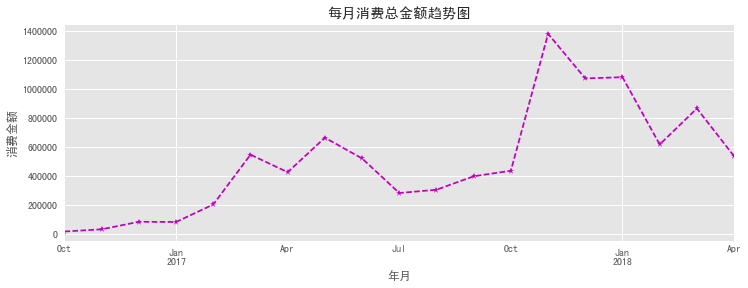

In [43]:
plt.figure(1,figsize=(12,4))
plt.style.use('ggplot')
order_amount_per_M.plot(style='*--m',title='每月消费总金额趋势图')
plt.xlabel('年月')
plt.ylabel('消费金额')

## 3.2 每月总消费次数

In [44]:
order_unique_ss=order_df.订单标识.drop_duplicates()

In [45]:
#每月父订单数
order_num_per_M=order_unique_ss.groupby(order_unique_ss.index.values.astype('datetime64[M]')).count()

In [46]:
order_num_per_M

2016-10-01      555
2016-11-01      672
2016-12-01     1681
2017-01-01     1785
2017-02-01     3328
2017-03-01     6990
2017-04-01     5121
2017-05-01     7744
2017-06-01     5961
2017-07-01     3138
2017-08-01     3614
2017-09-01     4649
2017-10-01     5261
2017-11-01    17321
2017-12-01    12710
2018-01-01    14920
2018-02-01     7816
2018-03-01    12664
2018-04-01     6794
Name: 订单标识, dtype: int64

In [47]:
#每月子订单数(一个父订单中有两种及以上不同的商品就会拆分成子订单)
order_df.groupby(order_df.index.values.astype('datetime64[M]')).订单标识.count()

2016-10-01      560
2016-11-01      710
2016-12-01     1713
2017-01-01     1859
2017-02-01     3446
2017-03-01     7515
2017-04-01     5391
2017-05-01     8225
2017-06-01     6493
2017-07-01     3782
2017-08-01     4673
2017-09-01     5048
2017-10-01     5569
2017-11-01    19585
2017-12-01    14544
2018-01-01    17075
2018-02-01     8607
2018-03-01    13958
2018-04-01     7331
Name: 订单标识, dtype: int64

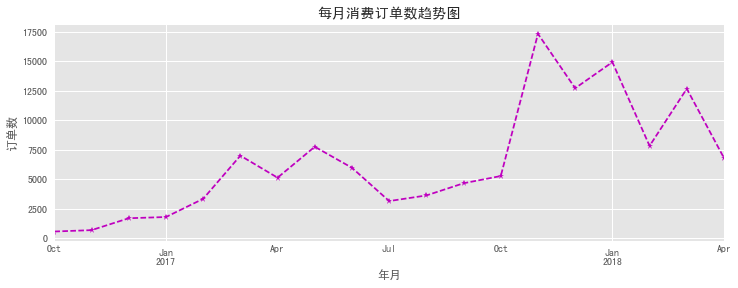

In [48]:
plt.figure(1,figsize=(12,4))
plt.style.use('ggplot')
order_num_per_M.plot(style='*--m',title='每月消费订单数趋势图')
plt.xlabel('年月')
plt.ylabel('订单数')

## 3.3 每月总产品购买量

In [49]:
product_num_per_M=order_df.groupby(order_df.index.values.astype('datetime64[M]')).宝贝数量.sum()

In [50]:
product_num_per_M

2016-10-01      576
2016-11-01      813
2016-12-01     4500
2017-01-01     3066
2017-02-01     4839
2017-03-01    10416
2017-04-01     7092
2017-05-01    10356
2017-06-01     8254
2017-07-01     4549
2017-08-01     5820
2017-09-01     6045
2017-10-01     6374
2017-11-01    24827
2017-12-01    17923
2018-01-01    18809
2018-02-01     9383
2018-03-01    15669
2018-04-01     8214
Name: 宝贝数量, dtype: int64

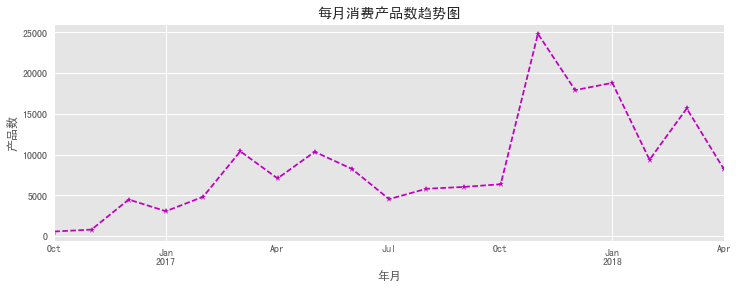

In [51]:
plt.figure(1,figsize=(12,4))
plt.style.use('ggplot')
product_num_per_M.plot(style='*--m',title='每月消费产品数趋势图')
plt.xlabel('年月')
plt.ylabel('产品数')

## 3.4 每月总消费人数

In [52]:
customer_unique_ss=order_df.drop_duplicates(subset=['付款年月','买家旺旺']).买家旺旺

In [53]:
customer_num_per_M=customer_unique_ss.groupby(customer_unique_ss.index.values.astype('datetime64[M]')).count()

In [54]:
customer_num_per_M

2016-10-01      547
2016-11-01      645
2016-12-01     1646
2017-01-01     1743
2017-02-01     3260
2017-03-01     6822
2017-04-01     4951
2017-05-01     7468
2017-06-01     5693
2017-07-01     3057
2017-08-01     3412
2017-09-01     4418
2017-10-01     5182
2017-11-01    16258
2017-12-01    12266
2018-01-01    14425
2018-02-01     7668
2018-03-01    12082
2018-04-01     6628
Name: 买家旺旺, dtype: int64

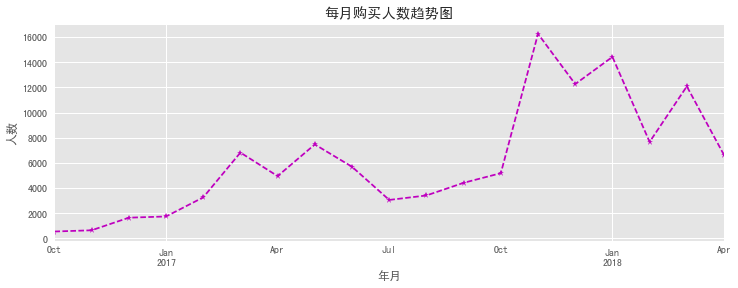

In [55]:
plt.figure(1,figsize=(12,4))
plt.style.use('ggplot')
customer_num_per_M.plot(style='*--m',title='每月购买人数趋势图')
plt.xlabel('年月')
plt.ylabel('人数')

## 3.5 每月用户平均消费金额

In [56]:
order_amount_per_M/customer_num_per_M

2016-10-01    27.114004
2016-11-01    46.652713
2016-12-01    49.818165
2017-01-01    46.225783
2017-02-01    61.771439
2017-03-01    79.889708
2017-04-01    85.622888
2017-05-01    88.680643
2017-06-01    91.114985
2017-07-01    91.702735
2017-08-01    88.837353
2017-09-01    89.593916
2017-10-01    83.773971
2017-11-01    84.782615
2017-12-01    87.306198
2018-01-01    74.828812
2018-02-01    80.261316
2018-03-01    71.472981
2018-04-01    80.596694
dtype: float64

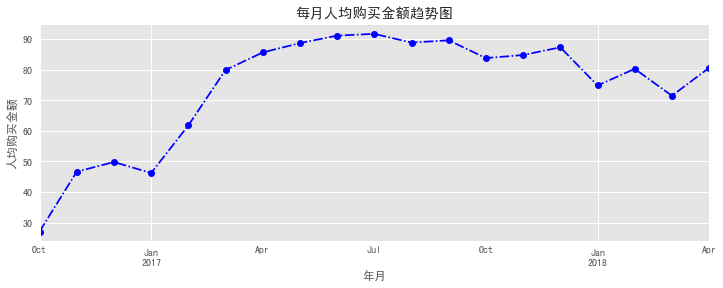

In [57]:
plt.figure(1,figsize=(12,4))
plt.style.use('ggplot')
(order_amount_per_M/customer_num_per_M).plot(style='o-.b',title='每月人均购买金额趋势图')
plt.xlabel('年月')
plt.ylabel('人均购买金额')

## 3.6 每月用户平均消费次数

In [58]:
order_num_per_M/customer_num_per_M

2016-10-01    1.014625
2016-11-01    1.041860
2016-12-01    1.021264
2017-01-01    1.024096
2017-02-01    1.020859
2017-03-01    1.024626
2017-04-01    1.034336
2017-05-01    1.036958
2017-06-01    1.047075
2017-07-01    1.026497
2017-08-01    1.059203
2017-09-01    1.052286
2017-10-01    1.015245
2017-11-01    1.065383
2017-12-01    1.036198
2018-01-01    1.034315
2018-02-01    1.019301
2018-03-01    1.048171
2018-04-01    1.025045
dtype: float64

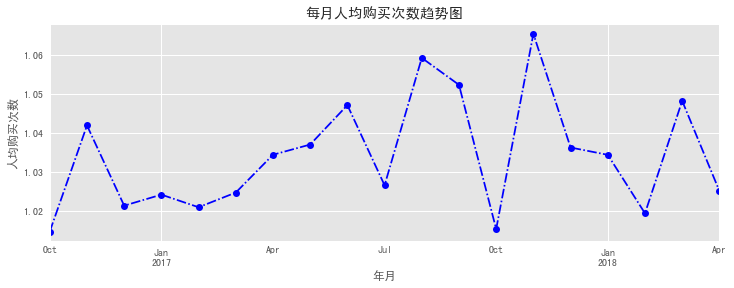

In [59]:
plt.figure(1,figsize=(12,4))
plt.style.use('ggplot')
(order_num_per_M/customer_num_per_M).plot(style='o-.b',title='每月人均购买次数趋势图')
plt.xlabel('年月')
plt.ylabel('人均购买次数')

In [60]:
#算人均购买次数的时候没有除去下单后当天就复购的，或者第二天就复购的一些售后问题订单

## 3.7 每月用户平均消费件数

In [61]:
product_num_per_M/customer_num_per_M

2016-10-01    1.053016
2016-11-01    1.260465
2016-12-01    2.733900
2017-01-01    1.759036
2017-02-01    1.484356
2017-03-01    1.526825
2017-04-01    1.432438
2017-05-01    1.386717
2017-06-01    1.449851
2017-07-01    1.488060
2017-08-01    1.705744
2017-09-01    1.368266
2017-10-01    1.230027
2017-11-01    1.527064
2017-12-01    1.461194
2018-01-01    1.303917
2018-02-01    1.223657
2018-03-01    1.296888
2018-04-01    1.239288
dtype: float64

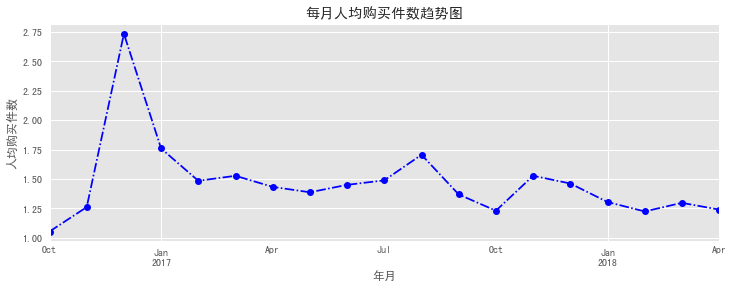

In [62]:
plt.figure(1,figsize=(12,4))
plt.style.use('ggplot')
(product_num_per_M/customer_num_per_M).plot(style='o-.b',title='每月人均购买件数趋势图')
plt.xlabel('年月')
plt.ylabel('人均购买件数')

# 4.用户个体消费分析
- 用户消费金额、消费次数、消费件数的描述统计
- 用户消费金额和消费次数的散点图
- 用户消费金额的分布图
- 用户消费次数的分布图
- 用户消费件数的分布图
- 用户累计消费金额占比(百分之多少的用户占了百分之多少的消费额)

## 4.1 用户消费金额、消费次数、消费件数的描述统计

### 消费金额

In [30]:
user_order_num_ss=order_df.groupby(['买家旺旺','订单标识']).订单号.count().reset_index().groupby('买家旺旺').订单标识.count()

In [31]:
user_order_num_ss.describe()

count    109902.000000
mean          1.116668
std           0.470125
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
Name: 订单标识, dtype: float64

### 消费次数

In [32]:
order_df_unigroup=order_df.drop_duplicates('订单标识').groupby('买家旺旺')

In [33]:
user_order_num_ss=order_df_unigroup.订单标识.count()

In [34]:
user_order_num_ss.describe()

count    109902.000000
mean          1.116668
std           0.470125
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
Name: 订单标识, dtype: float64

### 消费件数

In [35]:
user_product_num_ss=order_df.groupby('买家旺旺').宝贝数量.sum()

In [36]:
user_product_num_ss.head()

买家旺旺
0000nancy6       3
0000飞0000        1
000618hua        1
000dandan87      1
000littlejany    2
Name: 宝贝数量, dtype: int64

In [37]:
user_order_num_ss.describe()

count    109902.000000
mean          1.116668
std           0.470125
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          20.000000
Name: 订单标识, dtype: float64

## 4.2 用户消费金额和消费次数的散点图

In [38]:
user_order_amount_ss=order_df.groupby('买家旺旺').子订单金额.sum()

In [39]:
user_order_amount_ss.describe()

count    109902.000000
mean         86.568452
std          78.227578
min           0.000000
25%          54.830000
50%          66.020000
75%          88.500000
max        6081.700000
Name: 子订单金额, dtype: float64

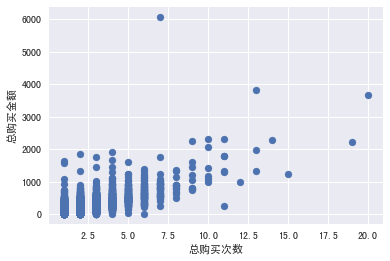

In [40]:
plt.scatter(user_order_num_ss,user_order_amount_ss)
plt.xlabel('总购买次数')
plt.ylabel('总购买金额')

## 4.3 用户消费次数的分布图

In [41]:
#user_order_df_unigroup.订单标识.count()

In [42]:
user_order_num_ss.value_counts()

1     100465
2       7427
3       1319
4        381
5        153
6         76
7         39
8         13
9          9
10         6
11         6
13         3
19         1
12         1
14         1
15         1
20         1
Name: 订单标识, dtype: int64

In [43]:
(user_order_num_ss.value_counts()/user_order_num_ss.value_counts().sum()).map(lambda x:str(round((x*100),2))+'%')

1     91.41%
2      6.76%
3       1.2%
4      0.35%
5      0.14%
6      0.07%
7      0.04%
8      0.01%
9      0.01%
10     0.01%
11     0.01%
13      0.0%
19      0.0%
12      0.0%
14      0.0%
15      0.0%
20      0.0%
Name: 订单标识, dtype: object

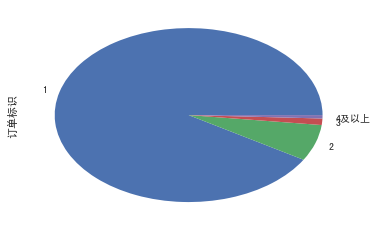

In [44]:
user_order_num_vcounts=pd.cut(user_order_num_ss,bins=[0.5,1.5,2.5,3.5,100],labels=['1','2','3','4及以上']).value_counts()
user_order_num_vcounts.plot(kind='pie')

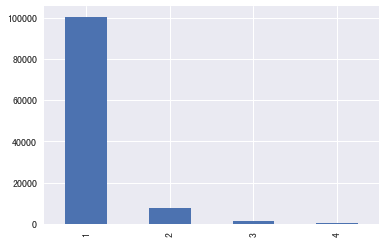

In [45]:
user_order_num_ss[user_order_num_ss<5].value_counts().plot.bar()

## 4.4 买家总购买件数分布

In [46]:
(user_product_num_ss.value_counts()/user_product_num_ss.value_counts().sum()).\
map(lambda x:str(round((x*100),2))+'%').head()

1    71.65%
2    18.97%
3     4.25%
4     2.13%
5     0.94%
Name: 宝贝数量, dtype: object

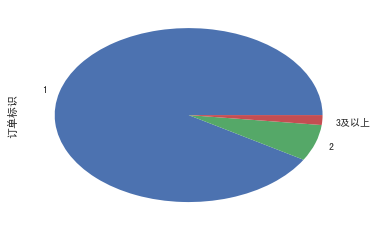

In [47]:
user_product_num_vcounts=pd.cut(user_order_num_ss,bins=[0.5,1.5,2.5,100],labels=['1','2','3及以上']).value_counts()
user_product_num_vcounts.plot(kind='pie')

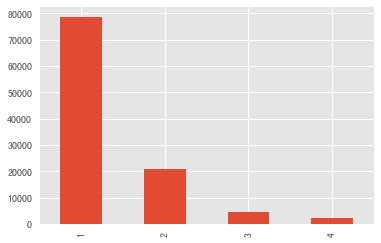

In [82]:
user_product_num_ss[(user_product_num_ss<5)&(user_product_num_ss>0)].value_counts().plot.bar()#排除宝贝数为0的退款订单

## 4.5 买家总购买金额分布

In [83]:
pd.qcut(user_order_amount_ss,q=5).value_counts()

(52.162, 66.02]    33123
[0, 52.162]        21981
(109, 6081.7]      21920
(66.02, 77.21]     20007
(77.21, 109]       12871
Name: 子订单金额, dtype: int64

In [84]:
(pd.qcut(user_order_amount_ss,q=5).value_counts()/user_order_amount_ss.count()).map(lambda x:str(round((x*100),2))+'%')

(52.162, 66.02]    30.14%
[0, 52.162]         20.0%
(109, 6081.7]      19.95%
(66.02, 77.21]      18.2%
(77.21, 109]       11.71%
Name: 子订单金额, dtype: object

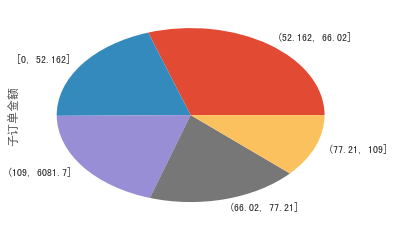

In [85]:
user_order_amount_vcounts=pd.qcut(user_order_amount_ss,q=5).value_counts()
user_order_amount_vcounts.plot(kind='pie')

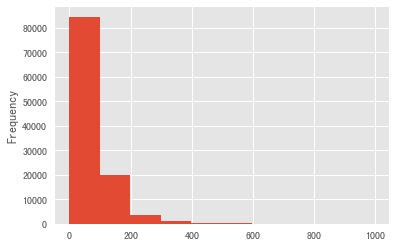

In [86]:
user_order_amount_ss[user_order_amount_ss<1000].plot.hist()

## 4.6 用户累计消费金额占比
(百分之多少的用户占了百分之多少的消费额,除去低价的优惠券和低于9元秒杀订单)

In [49]:
user_order_amount_ss_n0=user_order_amount_ss[user_order_amount_ss>9]

In [50]:
order_amount_cumsum=user_order_amount_ss_n0.sort_values(ascending=False).cumsum().round()/user_order_amount_ss_n0.sum()

In [51]:
order_amount_cumsum=order_amount_cumsum.reset_index()
order_amount_cumsum.columns=['买家旺旺','累计金额比例']

In [52]:
order_amount_cumsum['累计人数占比']=(order_amount_cumsum.index.values+1)/107878

In [54]:
order_amount_cumsum[order_amount_cumsum.累计金额比例>=0.5].head()

,买家旺旺,累计金额比例,累计人数占比
28760,达摩饭灶郎,0.500008,0.266607
28761,t_1491642434798_0376,0.500017,0.266616
28762,凯西guo,0.500027,0.266625
28763,yzm蝴蝶纷飞,0.500036,0.266635
28764,亦乔haha,0.500045,0.266644


前26%的客户贡献了50%销售额

In [55]:
order_amount_cumsum[order_amount_cumsum.累计人数占比>=0.6].head()

,买家旺旺,累计金额比例,累计人数占比
64726,娃娃0509,0.777068,0.600002
64727,千万誓言,0.777075,0.600011
64728,郝艳芳618618,0.777082,0.600020
64729,千与千寻cleya,0.777089,0.600030
64730,千与千寻我爱,0.777096,0.600039


后40%的客户贡献了22%的销售额

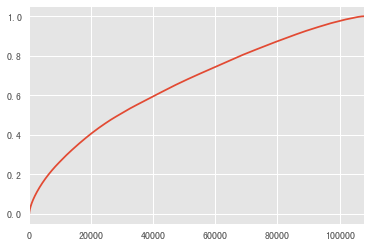

In [95]:
order_amount_cumsum.累计金额比例.plot()

由图可以看出，差不多消费金额前40000的人群贡献了60%左右的销售额，

## 5.用户消费行为
- 用户第一次消费
- 用户最后一次消费
- 新老客消费比
    - 多少用户仅消费了一次？
    - 每月新客占比？
- 用户分层
    -RFM
    -新、老、活跃、回流、流失
- 用户购买周期(按订单)
    - 用户消费周期描述
    - 用户消费周期分布
- 用户生命周期(按第一次&最后一次消费)
    - 用户生命周期描述
    - 用户消费周期分布

In [96]:
order_df.head()

,订单号,订单标识,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,买家旺旺,创建时间,SKU名称,付款年月,来源
付款时间,,,,,,,,,,,,
2016-10-07 06:40:00,2238336379574953,223833634953,Gifrer肌肤蕾法国生理盐水滴鼻剂婴儿宝宝通鼻塞液洗鼻通气海盐水,http://item.taobao.com/item.htm?id=538210886460,69.8,69.8,1,钱喵喵的口袋,2016-10-07 06:40:00,NaN,2016-10-01,无线
2016-10-08 09:33:00,2489373647833634,248937363634,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,scorpin21,2016-10-08 09:33:00,NaN,2016-10-01,无线
2016-10-08 11:51:00,2490241036301907,249024101907,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,细末灰尘,2016-10-08 11:51:00,NaN,2016-10-01,无线
2016-10-08 11:53:00,2395374681200879,239537460879,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,leezhh华华,2016-10-08 11:52:00,NaN,2016-10-01,无线
2016-10-08 12:12:00,2491386050130728,249138600728,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,恋上一滴泪922,2016-10-08 12:12:00,NaN,2016-10-01,无线


## 5.1 用户第一次消费月份
    每月新客数量

In [57]:
order_df_restindex=order_df.reset_index()

In [98]:
order_df_restindex['付款年月']=order_df_restindex.付款时间.values.astype('datetime64[M]')

In [99]:
newcus_per_M=order_df_restindex.groupby('买家旺旺').付款年月.min().value_counts()

In [281]:
newcus_per_M.sort_index()

2016-10-01      547
2016-11-01      641
2016-12-01     1635
2017-01-01     1702
2017-02-01     3211
2017-03-01     6687
2017-04-01     4778
2017-05-01     7180
2017-06-01     5283
2017-07-01     2810
2017-08-01     3024
2017-09-01     3922
2017-10-01     4879
2017-11-01    14815
2017-12-01    11379
2018-01-01    13417
2018-02-01     7165
2018-03-01    10995
2018-04-01     5832
Name: 付款年月, dtype: int64

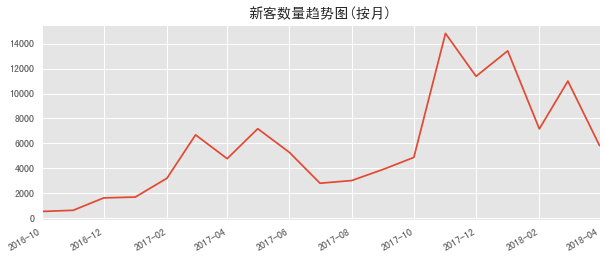

In [100]:
newcus_per_M.plot(title='新客数量趋势图(按月)',figsize=(10,4))

可以看出新客基本都是在2017.11-2018.1引进的

## 5.2 用户最后一次消费月份
    每月客户流失数量

In [58]:
losecus_per_M=order_df_restindex.groupby('买家旺旺').付款年月.max().value_counts()

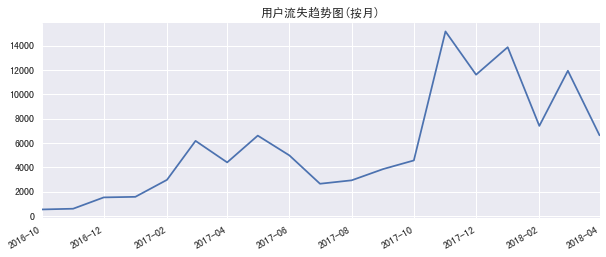

In [59]:
losecus_per_M.plot(title='用户流失趋势图(按月)',figsize=(10,4))

## 5.3 新老客占比(按月)

In [105]:
#每月新客占比
newcus_per_M/customer_num_per_M

2016-10-01    1.000000
2016-11-01    0.993798
2016-12-01    0.993317
2017-01-01    0.976477
2017-02-01    0.984969
2017-03-01    0.980211
2017-04-01    0.965058
2017-05-01    0.961435
2017-06-01    0.927982
2017-07-01    0.919202
2017-08-01    0.886284
2017-09-01    0.887732
2017-10-01    0.941528
2017-11-01    0.911244
2017-12-01    0.927686
2018-01-01    0.930121
2018-02-01    0.934403
2018-03-01    0.910031
2018-04-01    0.879903
dtype: float64

In [106]:
#每月老客占比
1-newcus_per_M/customer_num_per_M

2016-10-01    0.000000
2016-11-01    0.006202
2016-12-01    0.006683
2017-01-01    0.023523
2017-02-01    0.015031
2017-03-01    0.019789
2017-04-01    0.034942
2017-05-01    0.038565
2017-06-01    0.072018
2017-07-01    0.080798
2017-08-01    0.113716
2017-09-01    0.112268
2017-10-01    0.058472
2017-11-01    0.088756
2017-12-01    0.072314
2018-01-01    0.069879
2018-02-01    0.065597
2018-03-01    0.089969
2018-04-01    0.120097
dtype: float64

In [107]:
newcus_per_M

2017-11-01    14815
2018-01-01    13417
2017-12-01    11379
2018-03-01    10995
2017-05-01     7180
2018-02-01     7165
2017-03-01     6687
2018-04-01     5832
2017-06-01     5283
2017-10-01     4879
2017-04-01     4778
2017-09-01     3922
2017-02-01     3211
2017-08-01     3024
2017-07-01     2810
2017-01-01     1702
2016-12-01     1635
2016-11-01      641
2016-10-01      547
Name: 付款年月, dtype: int64

In [354]:
oldcus_per_M=customer_num_per_M-newcus_per_M

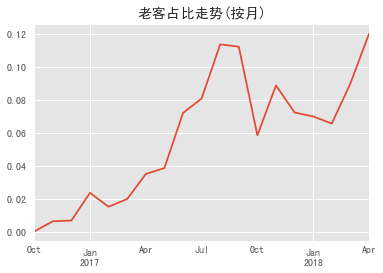

In [356]:
(oldcus_per_M/customer_num_per_M).plot(title='老客占比走势(按月)')

前期因为是新店，所以老客占比很低，到了中后期销售淡季的时候，拉新会减小，这个时候老客占比会变高

## 5.4 用户RFM分层

In [109]:
order_df_restindex.head()

,付款时间,订单号,订单标识,宝贝标题,宝贝链接,子订单金额,成交单价,宝贝数量,买家旺旺,创建时间,SKU名称,付款年月,来源
0,2016-10-07 06:40:00,2238336379574953,223833634953,Gifrer肌肤蕾法国生理盐水滴鼻剂婴儿宝宝通鼻塞液洗鼻通气海盐水,http://item.taobao.com/item.htm?id=538210886460,69.8,69.8,1,钱喵喵的口袋,2016-10-07 06:40:00,NaN,2016-10-01,无线
1,2016-10-08 09:33:00,2489373647833634,248937363634,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,scorpin21,2016-10-08 09:33:00,NaN,2016-10-01,无线
2,2016-10-08 11:51:00,2490241036301907,249024101907,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,细末灰尘,2016-10-08 11:51:00,NaN,2016-10-01,无线
3,2016-10-08 11:53:00,2395374681200879,239537460879,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,leezhh华华,2016-10-08 11:52:00,NaN,2016-10-01,无线
4,2016-10-08 12:12:00,2491386050130728,249138600728,10元优惠券，拍下联系客服,http://item.taobao.com/item.htm?id=539698601172,1.0,1.0,1,恋上一滴泪922,2016-10-08 12:12:00,NaN,2016-10-01,无线


In [110]:
order_df_restindex=order_df_restindex.groupby(['订单标识','买家旺旺','付款时间','付款年月']).agg({'子订单金额':'sum','宝贝数量':'sum'}).reset_index()

In [111]:
order_df_restindex.columns

Index(['订单标识', '买家旺旺', '付款时间', '付款年月', '子订单金额', '宝贝数量'], dtype='object')

In [112]:
order_df_restindex.columns=['订单标识', '买家旺旺', '付款时间', '付款年月', '订单金额', '宝贝数量']

In [113]:
order_df_restindex['付款日']=order_df_restindex['付款时间'].values.astype('datetime64[D]')

In [114]:
RFM_df=order_df_restindex.pivot_table(index='买家旺旺',values=['付款时间','订单金额','订单标识','宝贝数量'],
                               aggfunc={'付款时间':'max','订单金额':'sum','订单标识':'count','宝贝数量':'sum'})

In [115]:
RFM_df.columns

Index(['付款时间', '宝贝数量', '订单标识', '订单金额'], dtype='object')

In [116]:
RFM_df.columns=['最近购买', '总数量', '总次数', '总金额']

总次数需要考虑除去当天下多个订单，或者两天内下多个订单的用户，
当天的可以考虑按照买家旺旺和付款时间(day)进行groupby。
两天或多天的用shift计算差值然后排除

In [117]:
RFM_df['最近购买']=(RFM_df.最近购买.max()-RFM_df.最近购买)/np.timedelta64(1,'D')

In [118]:
RFM_df['总次数']=order_df_restindex.groupby(['买家旺旺','付款日']).apply(lambda x:1).reset_index().groupby('买家旺旺').付款日.count()

In [119]:
RFM_df.columns

Index(['最近购买', '总数量', '总次数', '总金额'], dtype='object')

In [120]:
RFM_df.columns=['R','N','F','M']

In [121]:
#按照RFM三项指标和各自的平均数的差值是否大于等于0来打标签
def RFM_label(x):
    y=''
    if x['R']>=0:
        y+='0'
    else:
        y+='1'
    if x['F']>=0:
        y+='1'
    else:
        y+='0'
    if x['M']>=0:
        y+='1'
    else:
        y+='0'
    map_dict={
        '000':'一般发展客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '110':'一般价值客户',
        '001':'重要发展客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '111':'重要价值客户'
        }
    return(map_dict[y])

In [122]:
RFM_df['label']=RFM_df.apply(lambda x:x-x.mean()).apply(RFM_label,axis=1)

In [377]:
RFM_df.head()

,R,N,F,M,label,color
买家旺旺,,,,,,
0000nancy6,139.965278,3,2,180.72,重要价值客户,r
0000飞0000,333.436806,1,1,77.21,一般发展客户,b
000618hua,535.584028,1,1,38.05,一般发展客户,b
000dandan87,186.543750,1,1,77.21,一般挽留客户,b
000littlejany,244.031250,2,1,60.00,一般发展客户,b


In [123]:
RFM_df['label'].value_counts()

一般挽留客户    49581
一般发展客户    29244
重要挽留客户    13737
重要发展客户     9282
重要价值客户     5723
重要保持客户     1839
一般价值客户      387
一般保持客户      109
Name: label, dtype: int64

In [124]:
#sns.factorplot('F','M',data=RFM_df[RFM_df.M<3000],kind='point',row='label',ci=False)

In [418]:
#为三类客户赋值和其他类别不一样的颜色
RFM_df['color']='b'
RFM_df.loc[RFM_df.label=='重要价值客户','color']='r'
RFM_df.loc[RFM_df.label=='一般发展客户','color']='g'
RFM_df.loc[RFM_df.label=='一般挽留客户','color']='y'

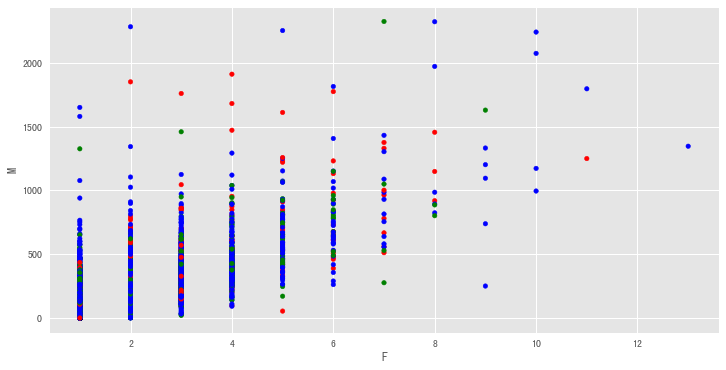

In [415]:
#查看F和M的散点分布
RFM_df[RFM_df.M<3000].plot.scatter('F','M',c=RFM_df.color,figsize=(12,6))

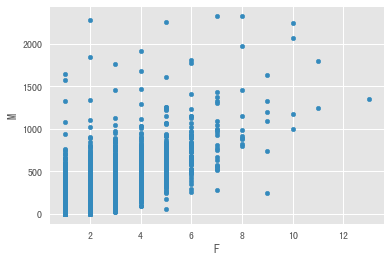

In [127]:
RFM_df[RFM_df.M<3000].plot.scatter('F','M')

## 5.5 用户生命周期分层
- 新、老、活跃、回流、流失

In [128]:
order_df_restindex.head()

,订单标识,买家旺旺,付款时间,付款年月,订单金额,宝贝数量,付款日
0,100000237543,瑞哥嚣张瑞瑞,2017-12-20 16:29:00,2017-12-01,128.00,2,2017-12-20
1,100001060610,花间小妖f,2017-12-01 12:02:00,2017-12-01,144.35,1,2017-12-01
2,100001388032,伊莜语,2017-12-20 16:25:00,2017-12-01,61.02,1,2017-12-20
3,100001413453,多思思1,2017-12-20 16:29:00,2017-12-01,128.00,2,2017-12-20
4,100002980843,riverredwave,2017-12-20 16:36:00,2017-12-01,61.02,1,2017-12-20


In [129]:
pivoted_counts=order_df_restindex.pivot_table(index='买家旺旺',
                              columns='付款年月',
                              values='订单标识',
                              aggfunc='count').fillna(0)
pivoted_counts.head()

付款年月,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
买家旺旺,,,,,,,,,,,,,,,,,,,
0000nancy6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
0000飞0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000618hua,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000dandan87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
000littlejany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
#将购买一次及以上的客户都改为1表示购买
purchase_df=pivoted_counts.applymap(lambda x:1 if x>0 else 0)

In [131]:
purchase_df.head()

付款年月,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
买家旺旺,,,,,,,,,,,,,,,,,,,
0000nancy6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
0000飞0000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
000618hua,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
000dandan87,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
000littlejany,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [132]:
def user_state(x):
    L=[]
    for i in range(len(x)):
        if i==0:
            if x.iloc[i]==0:
                L.append('unreg')
            else:
                L.append('new')
        else:
            if x.iloc[i]==0:
                if L[i-1]=='unreg':
                    L.append('unreg')
                else:
                    L.append('unactive')
            else:
                if L[i-1]=='unreg':
                    L.append('new')
                elif L[i-1]=='unactive':
                    L.append('return')
                else:
                    L.append('active')
    return(L)

### 函数说明：
#### 若是第一个月
- 若本月没有消费，则为未注册
- 若本月消费，则为新用户

#### 若非第一个月
- 若本月没有消费，如果上个月是为注册，则为未注册,其他为不活跃。
- 若本月有消费，如果上个月是为注册，则为新用户,如果上个月是不活跃，则为重新回购，其他为活跃。

In [133]:
purchase_state=purchase_df.apply(user_state,axis=1)

In [134]:
purchase_state.head()

付款年月,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
买家旺旺,,,,,,,,,,,,,,,,,,,
0000nancy6,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,active,unactive,unactive,unactive,unactive
0000飞0000,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
000618hua,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
000dandan87,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive
000littlejany,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


### 每个月不同状态的人数统计

In [135]:
#因为未注册没意义，所以改成NaN，这一value_counts不会统计进去
purchase_state.replace('unreg',np.NaN)

付款年月,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
买家旺旺,,,,,,,,,,,,,,,,,,,
0000nancy6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,active,unactive,unactive,unactive,unactive
0000飞0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
000618hua,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
000dandan87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive
000littlejany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
000maggie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive
000太婆,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
000波波,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
000王珏000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,new,unactive,unactive


In [136]:
purchase_state_ct=purchase_state.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))

In [137]:
#每月
purchase_state_ct.T.fillna(0)

,active,new,return,unactive
付款年月,,,,
2016-10-01,0.0,547.0,0.0,0.0
2016-11-01,4.0,641.0,0.0,543.0
2016-12-01,9.0,1635.0,2.0,1177.0
2017-01-01,34.0,1702.0,7.0,2782.0
2017-02-01,32.0,3211.0,17.0,4476.0
2017-03-01,82.0,6687.0,53.0,7601.0
2017-04-01,108.0,4778.0,65.0,14250.0
2017-05-01,116.0,7180.0,172.0,18913.0
2017-06-01,206.0,5283.0,204.0,25971.0


In [138]:
purchase_state_ct.T.fillna(0).apply(lambda x:x/(x.sum()),axis=1)

,active,new,return,unactive
付款年月,,,,
2016-10-01,0.000000,1.000000,0.000000,0.000000
2016-11-01,0.003367,0.539562,0.000000,0.457071
2016-12-01,0.003188,0.579171,0.000708,0.416932
2017-01-01,0.007514,0.376133,0.001547,0.614807
2017-02-01,0.004137,0.415072,0.002198,0.578594
2017-03-01,0.005685,0.463634,0.003675,0.527005
2017-04-01,0.005625,0.248841,0.003385,0.742149
2017-05-01,0.004397,0.272166,0.006520,0.716917
2017-06-01,0.006506,0.166846,0.006443,0.820206


由上表可知，每月的用户消费状态变化
- 活跃用户，持续消费的用户，对应的是消费运营的质量
- 回流用户，之前不消费本月才消费，对应的是换回运营
- 不活跃用户，对应的是流失

## 5.6 用户购买周期

### 用户购买周期描述

In [139]:
order_df_restindex.head()

,订单标识,买家旺旺,付款时间,付款年月,订单金额,宝贝数量,付款日
0,100000237543,瑞哥嚣张瑞瑞,2017-12-20 16:29:00,2017-12-01,128.00,2,2017-12-20
1,100001060610,花间小妖f,2017-12-01 12:02:00,2017-12-01,144.35,1,2017-12-01
2,100001388032,伊莜语,2017-12-20 16:25:00,2017-12-01,61.02,1,2017-12-20
3,100001413453,多思思1,2017-12-20 16:29:00,2017-12-01,128.00,2,2017-12-20
4,100002980843,riverredwave,2017-12-20 16:36:00,2017-12-01,61.02,1,2017-12-20


In [140]:
order_df_restindex=order_df_restindex.sort_values(by=['买家旺旺','付款时间'])

In [141]:
order_tdiff=order_df_restindex.groupby('买家旺旺').apply(lambda x:x.付款时间-x.付款时间.shift())

In [142]:
order_tdiff.head()

买家旺旺               
0000nancy6   114911                NaT
             118171   15 days 07:32:00
0000飞0000    91026                 NaT
000618hua    68986                 NaT
000dandan87  103246                NaT
Name: 付款时间, dtype: timedelta64[ns]

In [147]:
order_tdiff2=order_df_restindex.groupby('买家旺旺').付款时间.apply(lambda x:x-x.shift())

In [148]:
order_tdiff2.head()

114911                NaT
118171   15 days 07:32:00
91026                 NaT
68986                 NaT
103246                NaT
Name: 付款时间, dtype: timedelta64[ns]

统计订单间隔时，2天内复购人群应当单独统计

In [187]:
#排除了当天重复购买的订单
order_tcut_df=pd.cut(order_tdiff/np.timedelta64(1,'D'),bins=[-0.5,1.5,2.5,3.5,30,60,90,180,360,720]).value_counts().reset_index()

In [188]:
order_tcut_df['占比']=order_tcut_df['付款时间']/(order_tcut_df['付款时间'].sum())

In [189]:
order_tcut_df.columns=['间隔段','数量','占比']

In [190]:
print('     订单周期分布表')
order_tcut_df.set_index('间隔段')

     订单周期分布表


,数量,占比
间隔段,,
"(3.5, 30]",2734,0.213194
"(-0.5, 1.5]",2607,0.203291
"(90, 180]",2196,0.171241
"(30, 60]",2023,0.157751
"(60, 90]",1387,0.108157
"(180, 360]",1257,0.098019
"(1.5, 2.5]",270,0.021054
"(2.5, 3.5]",232,0.018091
"(360, 720]",118,0.009201


复购周期和单次购买金额/数量相关，买得多的人周期就会比较长

### 用户购买周期分布

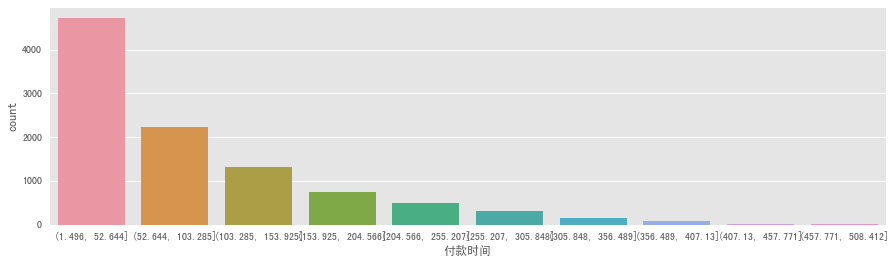

In [163]:
plt.figure(figsize=(15,4))
sns.countplot(pd.cut((order_tdiff[order_tdiff>'2 days']/np.timedelta64(1,'D')),bins=10))

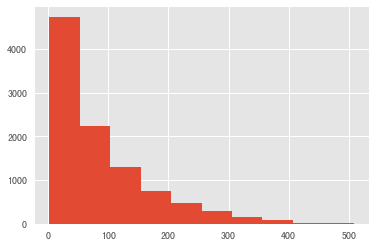

In [164]:
(order_tdiff[order_tdiff>'2 days']/np.timedelta64(1,'D')).hist()

## 5.7 用户生命长度

### 用户生命长度描述

In [144]:
user_life_ss=(order_df_restindex.groupby('买家旺旺').付款时间.apply(lambda x:x.max()-x.min()))/np.timedelta64(1,'D')

In [192]:
life_tcut_df=pd.cut(user_life_ss,bins=[-0.5,1.5,2.5,3.5,30,60,90,180,360,720]).value_counts().reset_index()

In [193]:
life_tcut_df['占比']=life_tcut_df['付款时间']/(life_tcut_df['付款时间'].sum())

In [195]:
life_tcut_df.columns=['间隔段','数量','占比']

In [196]:
print('     生命周期分布表')
life_tcut_df.set_index('间隔段')

     生命周期分布表


,数量,占比
间隔段,,
"(-0.5, 1.5]",102111,0.929110
"(90, 180]",1860,0.016924
"(3.5, 30]",1663,0.015132
"(180, 360]",1589,0.014458
"(30, 60]",1171,0.010655
"(60, 90]",943,0.008580
"(360, 720]",202,0.001838
"(1.5, 2.5]",200,0.001820
"(2.5, 3.5]",163,0.001483


### 用户生命长度分布

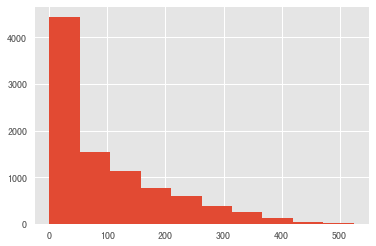

In [146]:
user_life_ss[user_life_ss>0].hist(bins=10)

## 5.8 复购和回购分析
复购率  
自然月内，购买多次的用户占比  
回购率  
曾经购买过的用户在某一时期内的再次购买的占比

### 复购率计算

In [197]:
order_df_restindex.head()

,订单标识,买家旺旺,付款时间,付款年月,订单金额,宝贝数量,付款日
114911,937139019772,0000nancy6,2017-11-26 17:14:00,2017-11-01,59.00,1,2017-11-26
118171,959293749772,0000nancy6,2017-12-12 00:46:00,2017-12-01,121.72,2,2017-12-12
91026,544627683253,0000飞0000,2017-06-01 13:27:00,2017-06-01,77.21,1,2017-06-01
68986,263879758164,000618hua,2016-11-11 09:55:00,2016-11-01,38.05,1,2016-11-11
103246,806791004586,000dandan87,2017-10-26 10:53:00,2017-10-01,77.21,1,2017-10-26


In [202]:
pivoted_user_buy=order_df_restindex.pivot_table(index='买家旺旺',
                              columns='付款年月',
                              values='订单标识',
                              aggfunc='count')
pivoted_user_buy.head()

付款年月,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
买家旺旺,,,,,,,,,,,,,,,,,,,
0000nancy6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
0000飞0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000618hua,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000dandan87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
000littlejany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
pivoted_user_buy=pivoted_user_buy.applymap(lambda x:1 if x>1 else 0 if x==1 else np.NaN)

In [206]:
pivoted_user_buy.head()

付款年月,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
买家旺旺,,,,,,,,,,,,,,,,,,,
0000nancy6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
0000飞0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000618hua,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000dandan87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
000littlejany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
fugou_df=pivoted_user_buy.apply(lambda x:pd.value_counts(x)).T

In [210]:
fugou_df.columns=['单购人数','复购人数']

In [366]:
fugou_df['复购率']=((fugou_df.复购人数)/(fugou_df.复购人数+fugou_df.单购人数)).round(2)

In [367]:
fugou_df.head()

,单购人数,复购人数,复购率
付款年月,,,
2016-10-01,542,5,0.01
2016-11-01,622,23,0.04
2016-12-01,1619,27,0.02
2017-01-01,1704,39,0.02
2017-02-01,3198,62,0.02


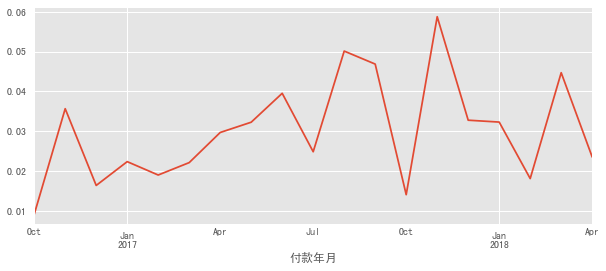

In [216]:
fugou_df.复购率.plot(figsize=(10,4))

### 回购率计算

### (1)次月回购率
    当月购买客户在下个月继续购买的人数在当月的占比

In [218]:
pivoted_user_buy.head()

付款年月,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
买家旺旺,,,,,,,,,,,,,,,,,,,
0000nancy6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
0000飞0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000618hua,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000dandan87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
000littlejany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [335]:
def huigou_2month(x):
    L=[]
    for i in range((len(x)-1)):
        if x[i]>=0:
            if x[i+1]>=0:
                L.append(1)
            else:
                L.append(0)
        else:
            L.append(np.NaN)
    if x[len(x)-1]>=0:
        L.append(0)
    else:
        L.append(np.NaN)
    return(L)

In [337]:
huigou_2month_df=pivoted_user_buy.apply(lambda x:huigou_2month(x),axis=1)

In [338]:
huigou_2month_df=huigou_2month_df.apply(lambda x:pd.value_counts(x)).T

In [339]:
huigou_2month_df.columns=['次月不回购人数','次月回购人数']

In [340]:
huigou_2month_df['次月回购率']=(huigou_2month_df.次月回购人数/(huigou_2month_df.次月回购人数+huigou_2month_df.次月不回购人数)).round(2)

In [345]:
huigou_2month_df.iloc[18,1]=0
huigou_2month_df.iloc[18,2]=0
huigou_2month_df['次月不回购人数']=huigou_2month_df.次月不回购人数.astype('int')
huigou_2month_df['次月回购人数']=huigou_2month_df.次月回购人数.astype('int')

In [346]:
huigou_2month_df

,次月不回购人数,次月回购人数,次月回购率
付款年月,,,
2016-10-01,543,4,0.01
2016-11-01,636,9,0.01
2016-12-01,1612,34,0.02
2017-01-01,1711,32,0.02
2017-02-01,3178,82,0.03
2017-03-01,6714,108,0.02
2017-04-01,4835,116,0.02
2017-05-01,7262,206,0.03
2017-06-01,5601,92,0.02


### (2)当月新客回购率
    当月购买新客在后面所有月份有继续购买的人数在当月的占比

In [255]:
order_df_restindex.head()

,订单标识,买家旺旺,付款时间,付款年月,订单金额,宝贝数量,付款日
114911,937139019772,0000nancy6,2017-11-26 17:14:00,2017-11-01,59.00,1,2017-11-26
118171,959293749772,0000nancy6,2017-12-12 00:46:00,2017-12-01,121.72,2,2017-12-12
91026,544627683253,0000飞0000,2017-06-01 13:27:00,2017-06-01,77.21,1,2017-06-01
68986,263879758164,000618hua,2016-11-11 09:55:00,2016-11-01,38.05,1,2016-11-11
103246,806791004586,000dandan87,2017-10-26 10:53:00,2017-10-01,77.21,1,2017-10-26


In [282]:
newhuigou_df=order_df_restindex.groupby(['买家旺旺','付款年月']).宝贝数量.count().reset_index().\
groupby('买家旺旺').agg({'付款年月':'min','宝贝数量':'count'})

In [283]:
newhuigou_df.columns=['最早购买年月','总购买月份数']

In [284]:
newhuigou_df.head()

,最早购买年月,总购买月份数
买家旺旺,,
0000nancy6,2017-11-01,2
0000飞0000,2017-06-01,1
000618hua,2016-11-01,1
000dandan87,2017-10-01,1
000littlejany,2017-08-01,1


In [285]:
newhuigou_df['是否回购']=newhuigou_df.总购买月份数.map(lambda x:1 if x>1 else 0)

In [286]:
newhuigou_df.head()

,最早购买年月,总购买月份数,是否回购
买家旺旺,,,
0000nancy6,2017-11-01,2,1
0000飞0000,2017-06-01,1,0
000618hua,2016-11-01,1,0
000dandan87,2017-10-01,1,0
000littlejany,2017-08-01,1,0


In [287]:
newhuigou_df=newhuigou_df.reset_index().groupby('最早购买年月').是否回购.agg(['count','sum'])

In [288]:
newhuigou_df['回购率']=(newhuigou_df['sum']/newhuigou_df['count']).round(2)

In [293]:
newhuigou_df.columns=['新客数','新客回购人数','新客回购率']

In [294]:
newhuigou_df

,新客数,新客回购人数,新客回购率
最早购买年月,,,
2016-10-01,547,18,0.03
2016-11-01,641,51,0.08
2016-12-01,1635,119,0.07
2017-01-01,1702,161,0.09
2017-02-01,3211,275,0.09
2017-03-01,6687,617,0.09
2017-04-01,4778,493,0.10
2017-05-01,7180,746,0.10
2017-06-01,5283,561,0.11


### (3)当月所有客户回购率
    当月购买所有客户在后面所有月份有继续购买的人数在当月的占比

In [297]:
def huigou_after(x):
    L=[]
    for i in range((len(x)-1)):
        if x[i]>=0:
            for j in range(i+1,len(x)):
                if x[j]>=0:
                    L.append(1)
                    break
                else:
                    if j==len(x)-1:
                        L.append(0)
        else:
            L.append(np.NaN)
    if x[len(x)-1]>=0:
        L.append(0)
    else:
        L.append(np.NaN)
    return(L)

In [328]:
huigou_after_df=pivoted_user_buy.apply(lambda x:huigou_after(x),axis=1)

In [329]:
huigou_after_df.head()

付款年月,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
买家旺旺,,,,,,,,,,,,,,,,,,,
0000nancy6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
0000飞0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000618hua,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
000dandan87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
000littlejany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [330]:
huigou_after_df=huigou_after_df.apply(lambda x:pd.value_counts(x)).T

In [331]:
huigou_after_df.columns=['往后不回购人数','往后回购人数']

In [347]:
huigou_after_df['往后回购率']=(huigou_after_df.往后回购人数/(huigou_after_df.往后回购人数+huigou_after_df.往后不回购人数)).round(2)

In [348]:
huigou_after_df.iloc[18,1]=0
huigou_after_df.iloc[18,2]=0
huigou_after_df['往后不回购人数']=huigou_after_df.往后不回购人数.astype('int')
huigou_after_df['往后回购人数']=huigou_after_df.往后回购人数.astype('int')

In [349]:
huigou_after_df

,往后不回购人数,往后回购人数,往后回购率
付款年月,,,
2016-10-01,529,18,0.03
2016-11-01,591,54,0.08
2016-12-01,1521,125,0.08
2017-01-01,1568,175,0.10
2017-02-01,2965,295,0.09
2017-03-01,6168,654,0.10
2017-04-01,4399,552,0.11
2017-05-01,6601,867,0.12
2017-06-01,4973,720,0.13


### 老客在当月客户中的占比
    根据客户购买时间最小值已计算出新客占比，相减就是老客

### 新老客复购回购统计总表

In [369]:
fuhuigou_df=pd.concat([customer_num_per_M,oldcus_per_M,oldcus_per_M/customer_num_per_M,huigou_after_df.iloc[:,1:3],\
          huigou_2month_df.iloc[:,1:3],newhuigou_df.iloc[:,1:3],fugou_df.iloc[:,1:3]],axis=1)

In [374]:
fuhuigou_df.columns=['总购买人数','老客数','老客占比','往后回购人数','往后回购率', '次月回购人数', '次月回购率',
       '新客回购人数','新客回购率','复购人数','复购率']

In [375]:
fuhuigou_df

,总购买人数,老客数,老客占比,往后回购人数,往后回购率,次月回购人数,次月回购率,新客回购人数,新客回购率,复购人数,复购率
2016-10-01,547,0,0.000000,18,0.03,4,0.01,18,0.03,5,0.01
2016-11-01,645,4,0.006202,54,0.08,9,0.01,51,0.08,23,0.04
2016-12-01,1646,11,0.006683,125,0.08,34,0.02,119,0.07,27,0.02
2017-01-01,1743,41,0.023523,175,0.10,32,0.02,161,0.09,39,0.02
2017-02-01,3260,49,0.015031,295,0.09,82,0.03,275,0.09,62,0.02
2017-03-01,6822,135,0.019789,654,0.10,108,0.02,617,0.09,151,0.02
2017-04-01,4951,173,0.034942,552,0.11,116,0.02,493,0.10,147,0.03
2017-05-01,7468,288,0.038565,867,0.12,206,0.03,746,0.10,241,0.03
2017-06-01,5693,410,0.072018,720,0.13,92,0.02,561,0.11,225,0.04
2017-07-01,3057,247,0.080798,413,0.14,81,0.03,308,0.11,76,0.02


老客占比说明了每月拉新力度和唤回老客的力度权衡。  
往后回购率说明了当月整体的运营质量，次月回购率则在当月运营质量的基础上m加上了次月的质量。  
新客回购率说明了当月的新客运营质量，影响它的可能有新客画像精准性、新客活动方案。  
复购率则和当月活动频次和力度有关。

# 6.用户特征分析
- 用户聚类
- 地域分布热力图
- 单因子分析
- 多因子交叉分析(地域、职业等因素对客单价和复购率的影响)

## 6.1 用户聚类

In [380]:
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [376]:
cus_df.head()

,买家昵称,买家姓名,性别,手机号,邮箱,会员状态,会员等级,信用等级,淘宝注册时间,最近交易时间,累计消费金额,成功交易笔数,平均客单价,购买宝贝件数,交易关闭笔数,交易关闭金额,未购买时间,省份,城市,收货地址
0,warjasonoz,洪建成,未知,13713214322,317379964@qq.com,正常,高级会员,一钻,2008-06-08 15:27:00,2018-05-01 22:33:00,67.21,1,67.21,1,0,0.00,12.0天,广东省,东莞市,中堂镇潢涌村东莞市建桦造纸有限公司
1,我是定伟,方芸,未知,13275181683,NaN,正常,店铺客户,未分级,2018-05-02 00:59:00,2018-05-01 20:55:00,0.00,0,0.00,0,1,175.70,12.0天,江苏省,扬州市,氾水镇成庄村五里组19号
2,qq276148623,温春蕾,未知,18868258287,ufo888ufo@yahoo.com.cn,正常,店铺客户,四心,2013-02-09 15:11:00,2018-05-01 18:53:00,0.00,0,0.00,0,1,28.00,12.0天,浙江省,温州市,松台街道勤奋路河通锦园5栋304
3,阿蓁小糯米团子,李双,未知,18682699772,NaN,正常,店铺客户,五心,2013-03-20 20:45:00,2018-05-01 17:26:00,0.00,0,0.00,0,3,286.34,12.0天,四川省,成都市,华阳镇街道南湖国际三期九栋二单元（易泊：五期晟湖26栋)
4,susie_hkvc,yanglin,未知,13988548202,491306235@qq.com,正常,店铺客户,一钻,2011-05-05 10:04:00,2018-05-01 16:14:00,0.00,0,0.00,0,1,98.97,12.0天,云南省,大理白族自治州,下关镇文化路 惠丰新城诏园1-707


In [378]:
RFM_df.head()

,R,N,F,M,label,color
买家旺旺,,,,,,
0000nancy6,139.965278,3,2,180.72,重要价值客户,r
0000飞0000,333.436806,1,1,77.21,一般发展客户,b
000618hua,535.584028,1,1,38.05,一般发展客户,b
000dandan87,186.543750,1,1,77.21,一般挽留客户,b
000littlejany,244.031250,2,1,60.00,一般发展客户,b


In [384]:
RFM_clt_df=RFM_df.drop(['label','color'],axis=1)

In [382]:
#将RFM数据标准化
model_scale=StandardScaler()

In [387]:
RFM_scaled_array=model_scale.fit_transform(RFM_clt_df)

In [397]:
#用KMeans将用户分为8类
model=KMeans(n_clusters=8)

In [398]:
model.fit(RFM_scaled_array)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [400]:
model.labels_

array([4, 1, 1, ..., 1, 0, 1], dtype=int32)

In [401]:
model.predict(RFM_scaled_array)

array([4, 1, 1, ..., 1, 0, 1], dtype=int32)

In [402]:
#将模型拟合结果标签赋值给RFM_df表新增列clt
RFM_df['clt']=model.labels_

In [417]:
RFM_df.clt.value_counts()

0    60431
1    31144
3     9880
4     6143
7     1580
5      414
2      284
6       26
Name: clt, dtype: int64

为0的是购买次数金额均较少但是最近购买的，为1的不是最近购买且金额次数较少

In [409]:
RFM_df[RFM_df.label=='重要价值客户'].clt.value_counts()

4    4175
7    1264
2     250
6      23
5      11
Name: clt, dtype: int64

In [410]:
RFM_df[RFM_df.label=='一般发展客户'].clt.value_counts()

1    24775
0     4077
5      308
3       84
Name: clt, dtype: int64

可以看出用K-means进行8分类的结果和先前自己打标的结果基本一致

In [421]:
#KMeans对应分类0,1,4对应颜色
RFM_df['cltcolor']='b'
RFM_df.loc[RFM_df.clt==4,'cltcolor']='r'
RFM_df.loc[RFM_df.clt==1,'cltcolor']='g'
RFM_df.loc[RFM_df.clt==0,'cltcolor']='y'

In [426]:
#将最近购买间隔等分成6个区间
RFM_df['R_cut']=pd.cut(RFM_df.R,bins=6)

In [427]:
RFM_df['R_cut'].value_counts()

(95.12, 190.24]     37459
(-0.571, 95.12]     30468
(285.36, 380.48]    16053
(380.48, 475.6]     12158
(190.24, 285.36]    10691
(475.6, 570.719]     3073
Name: R_cut, dtype: int64

In [440]:
R_cut_L=RFM_df['R_cut'].value_counts().sort_index().index.values

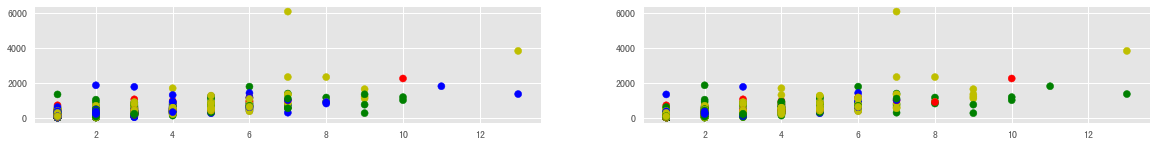

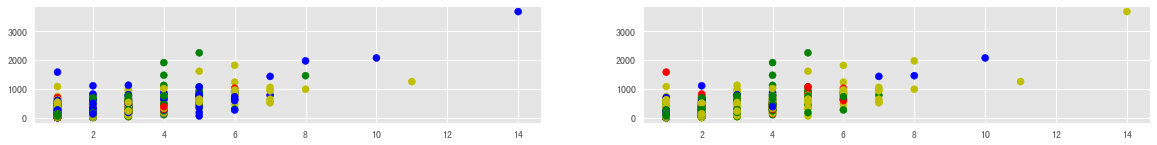

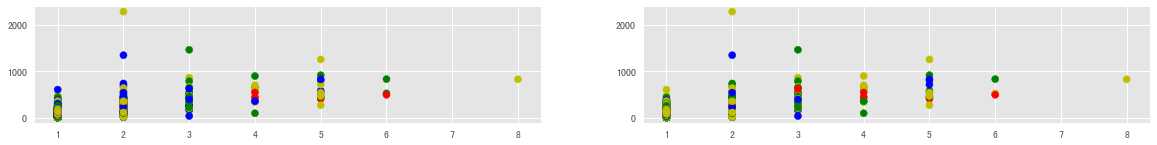

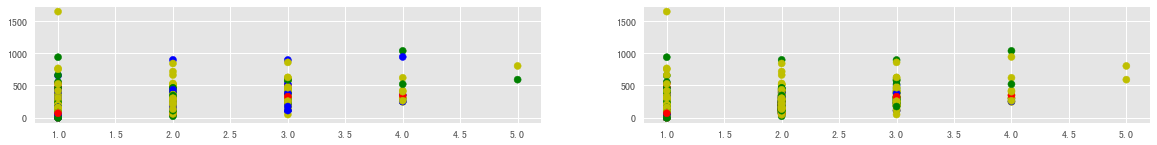

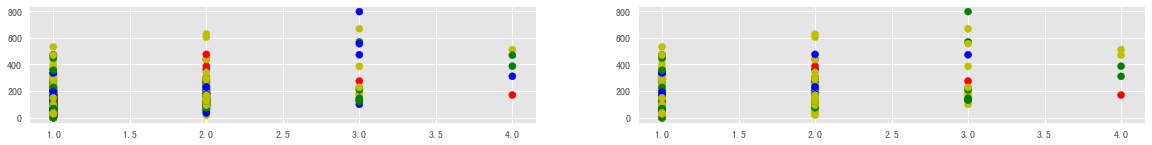

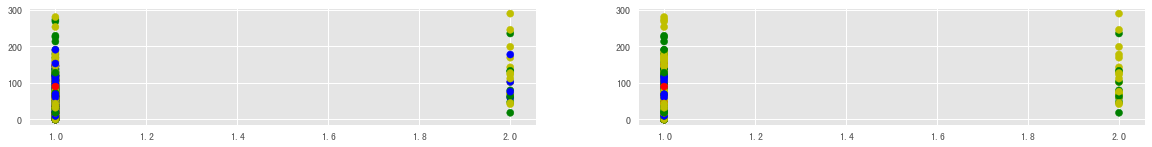

In [457]:
#F和M的散点图，左边用自己写的人群标签分类着色，右边用KMeans计算的分类着色
for i in range(6):
    plt.figure(figsize=(20,15))
    plt.subplot(6,2,i*2+1)
    plt.scatter('F','M',data=RFM_df[RFM_df.R_cut==R_cut_L[i]],c=RFM_df.color)
    plt.subplot(6,2,i*2+2)
    plt.scatter('F','M',data=RFM_df[RFM_df.R_cut==R_cut_L[i]],c=RFM_df.cltcolor)

In [459]:
cus_df.head()

,买家昵称,买家姓名,性别,手机号,邮箱,会员状态,会员等级,信用等级,淘宝注册时间,最近交易时间,累计消费金额,成功交易笔数,平均客单价,购买宝贝件数,交易关闭笔数,交易关闭金额,未购买时间,省份,城市,收货地址
0,warjasonoz,洪建成,未知,13713214322,317379964@qq.com,正常,高级会员,一钻,2008-06-08 15:27:00,2018-05-01 22:33:00,67.21,1,67.21,1,0,0.00,12.0天,广东省,东莞市,中堂镇潢涌村东莞市建桦造纸有限公司
1,我是定伟,方芸,未知,13275181683,NaN,正常,店铺客户,未分级,2018-05-02 00:59:00,2018-05-01 20:55:00,0.00,0,0.00,0,1,175.70,12.0天,江苏省,扬州市,氾水镇成庄村五里组19号
2,qq276148623,温春蕾,未知,18868258287,ufo888ufo@yahoo.com.cn,正常,店铺客户,四心,2013-02-09 15:11:00,2018-05-01 18:53:00,0.00,0,0.00,0,1,28.00,12.0天,浙江省,温州市,松台街道勤奋路河通锦园5栋304
3,阿蓁小糯米团子,李双,未知,18682699772,NaN,正常,店铺客户,五心,2013-03-20 20:45:00,2018-05-01 17:26:00,0.00,0,0.00,0,3,286.34,12.0天,四川省,成都市,华阳镇街道南湖国际三期九栋二单元（易泊：五期晟湖26栋)
4,susie_hkvc,yanglin,未知,13988548202,491306235@qq.com,正常,店铺客户,一钻,2011-05-05 10:04:00,2018-05-01 16:14:00,0.00,0,0.00,0,1,98.97,12.0天,云南省,大理白族自治州,下关镇文化路 惠丰新城诏园1-707


## 6.2 地域分布热力图
    使用百度Echarts(暂时被关闭了，无法查看，以后可能只能用百度地图了)

In [458]:
from pyecharts import Map

In [ ]:
shengfen_sale_ss=cus_df.groupby('省份').累计消费金额.sum()

In [477]:
value = list(shengfen_sale_ss.values)
attr = list(shengfen_sale_ss.index.values)

In [478]:
hotmap=Map("gifrer全国销售热力图", width=1200, height=600)

In [480]:
hotmap.add("", attr, value, maptype='china', is_visualmap=True,visual_text_color="#fff")
hotmap.render()

## 7.产品销售分析(待更新)
- 大促销售分析
- 产品关联分析
- 产品评价词云